In [1]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4051    0  4051    0     0   2110      0 --:--:--  0:00:01 --:--:--  2109
100  517k  100  517k    0     0   150k      0  0:00:03  0:00:03 --:--:--  387k
--2025-06-02 04:03:14--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.145.37, 104.19.144.37, 2606:4700::6813:9125, ...
Connecting to anaconda.org (anaconda.org)|104.19.145.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import seaborn as sns

# Load the CSV file for TSLA_historical_data.csv

df = pd.read_csv('TSLA_historical_data.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date to ensure time series correctness
df.sort_values('Date', inplace=True)

# Set 'Date' as index to make it time-series friendly
df.set_index('Date', inplace=True)

# Display the first few rows to understand the structure
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [3]:
# Calculate 20-day Simple Moving Average (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

# Calculate Relative Strength Index (RSI) with 14-day window
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

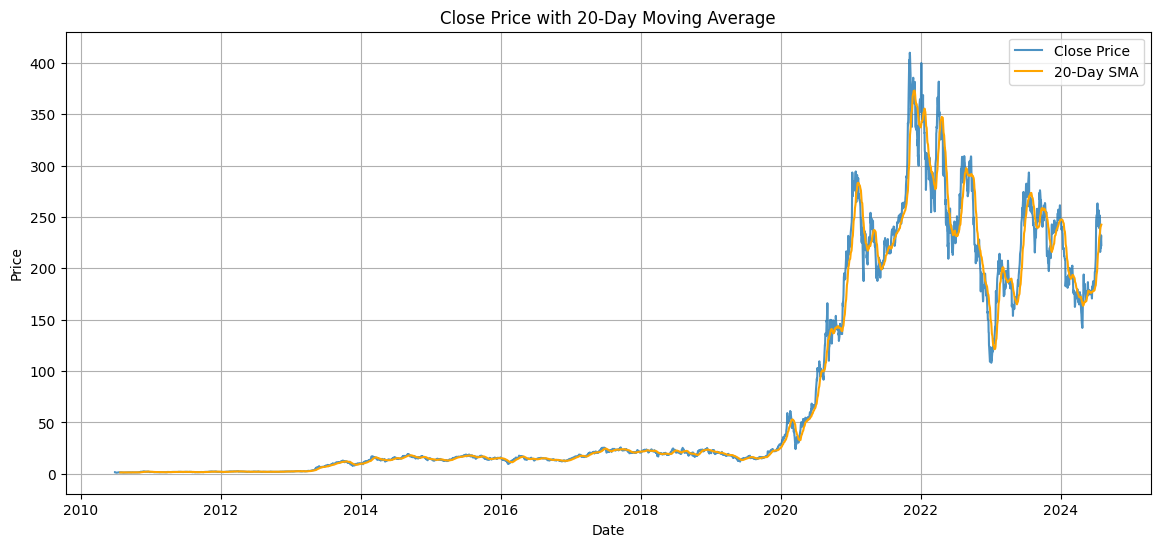

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.8)
plt.plot(df['SMA_20'], label='20-Day SMA', color='orange')
plt.title("Close Price with 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

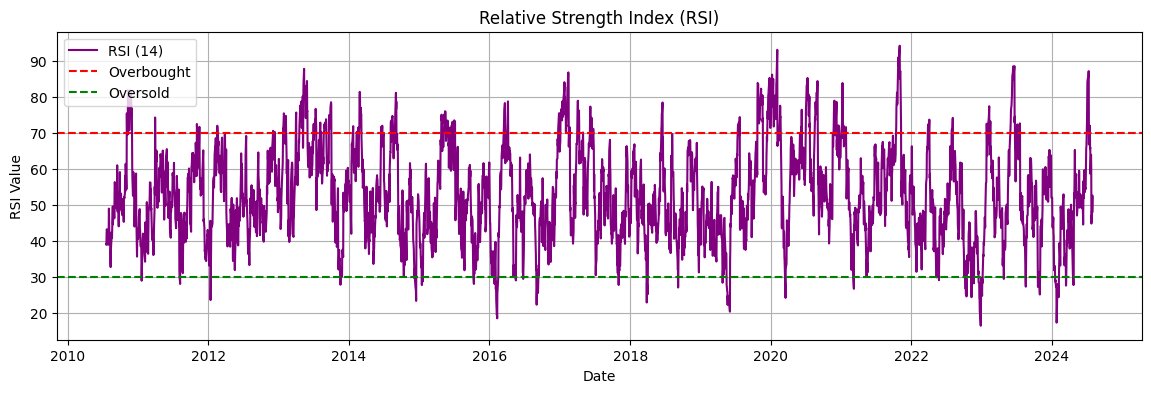

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(df['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

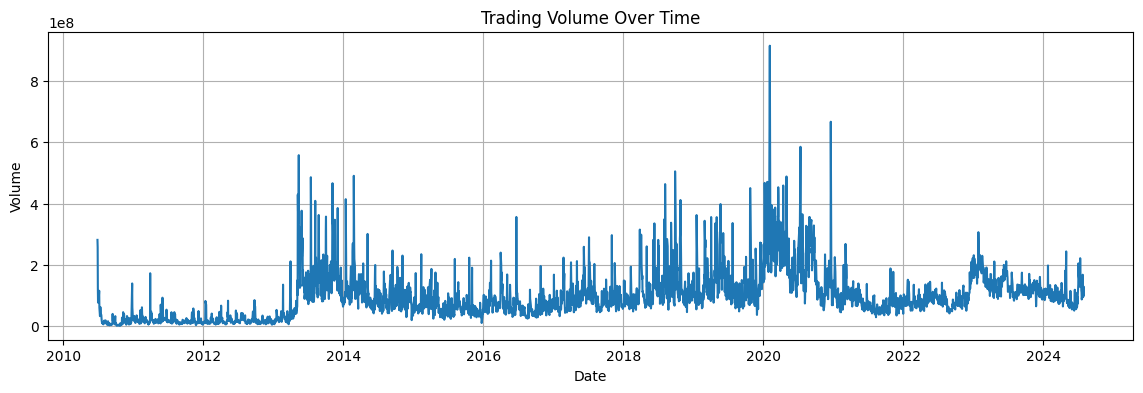

In [6]:
plt.figure(figsize=(14,4))
sns.lineplot(data=df, x=df.index, y='Volume')
plt.title("Trading Volume Over Time")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

In [7]:
# Calculate Daily Returns
daily_returns = df['Close'].pct_change().dropna()

# Calculate Mean Return
mean_return = daily_returns.mean()

# Calculate Volatility (Standard Deviation)
volatility = daily_returns.std()

# Calculate Sharpe Ratio (assuming risk-free rate ≈ 0 for simplicity)
sharpe_ratio = mean_return / volatility

# Display the results
print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Volatility (Standard Deviation): {volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Mean Daily Return: 0.0020
Volatility (Standard Deviation): 0.0359
Sharpe Ratio: 0.06
